In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_test/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Copy data from source directory to analysis directory

In [3]:
analyzer.copy_data_from_directory(source_data_filepath)

run not yet complete
L_180_beta_1.600000_itheta_0.000000_ntherm_0_nMC_10000
Status: 18 lines written
run not yet complete
L_180_beta_1.600000_itheta_0.785398_ntherm_0_nMC_10000
Status: 751 lines written
run not yet complete
L_180_beta_1.600000_itheta_1.570796_ntherm_0_nMC_10000
Status: 331 lines written
run not yet complete
L_180_beta_1.600000_itheta_2.356194_ntherm_0_nMC_10000
Status: 698 lines written
run not yet complete
L_180_beta_1.600000_itheta_3.141593_ntherm_0_nMC_10000
Status: 99 lines written


# Systematics plots

In [4]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [5]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [6]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480000,5.0,...,1,35,35,44,0.036694,0.890296,2.710455,0.223807,0.046216,-1.121317
1,10,100.0,-3.099152,-397.549965,-397.549965,3.169001,6.964259,3.693286,0.238182,56.0,...,1,35,35,44,1.745104,-0.071926,2.710455,0.223807,0.572060,0.023578
2,20,100.0,-4.000000,-442.745734,-442.745734,-2.883489,6.964259,3.693286,0.179524,106.0,...,1,35,35,44,0.068609,1.664636,2.710455,0.223807,0.024718,-0.599713
3,30,100.0,0.125517,-465.454254,-465.454254,-6.878379,6.964259,3.693286,0.161613,157.0,...,1,35,35,44,0.105966,2.571007,2.710455,0.223807,0.016004,-0.388293
4,40,100.0,0.717142,-471.968907,-471.968907,-9.850147,6.964259,3.693286,0.145610,160.0,...,1,35,35,44,0.126808,3.076675,2.710455,0.223807,0.013373,-0.324475


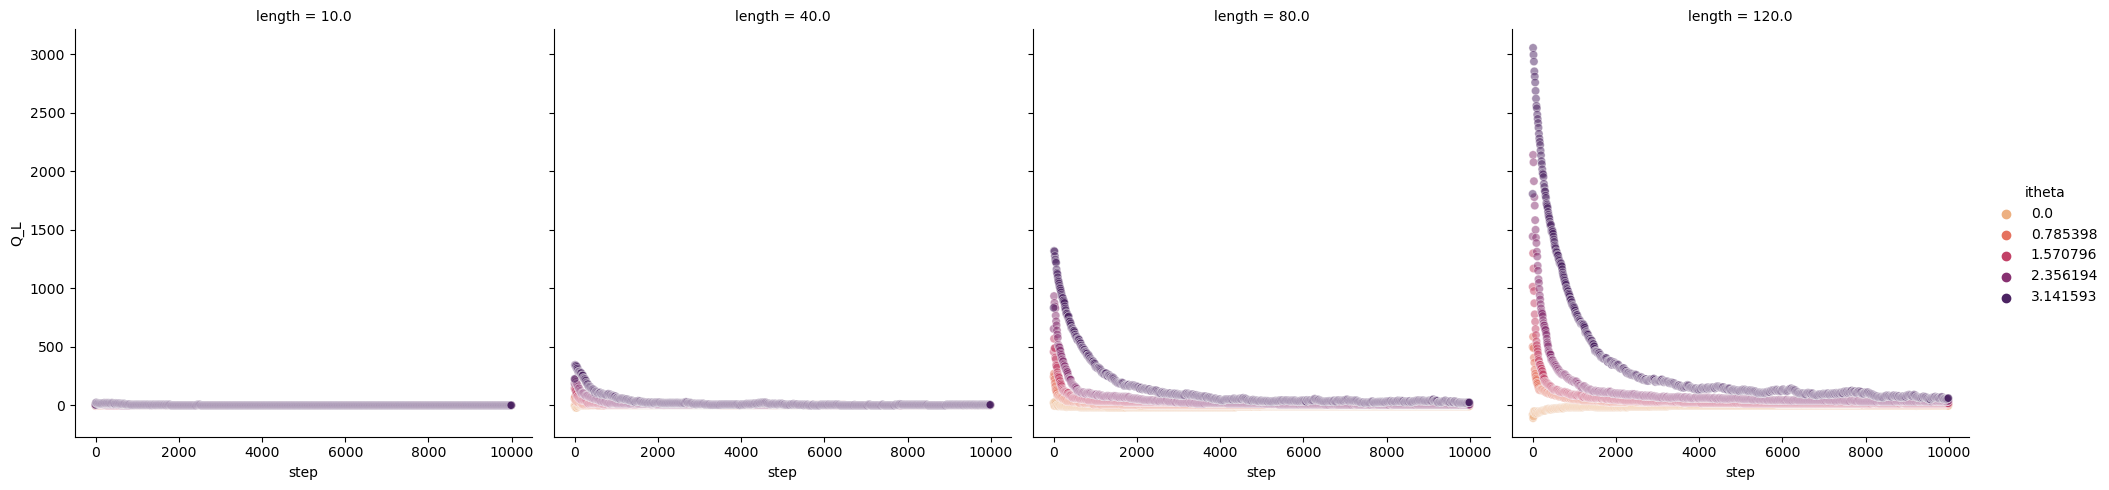

In [7]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.5,palette = "flare" )
plt.show()

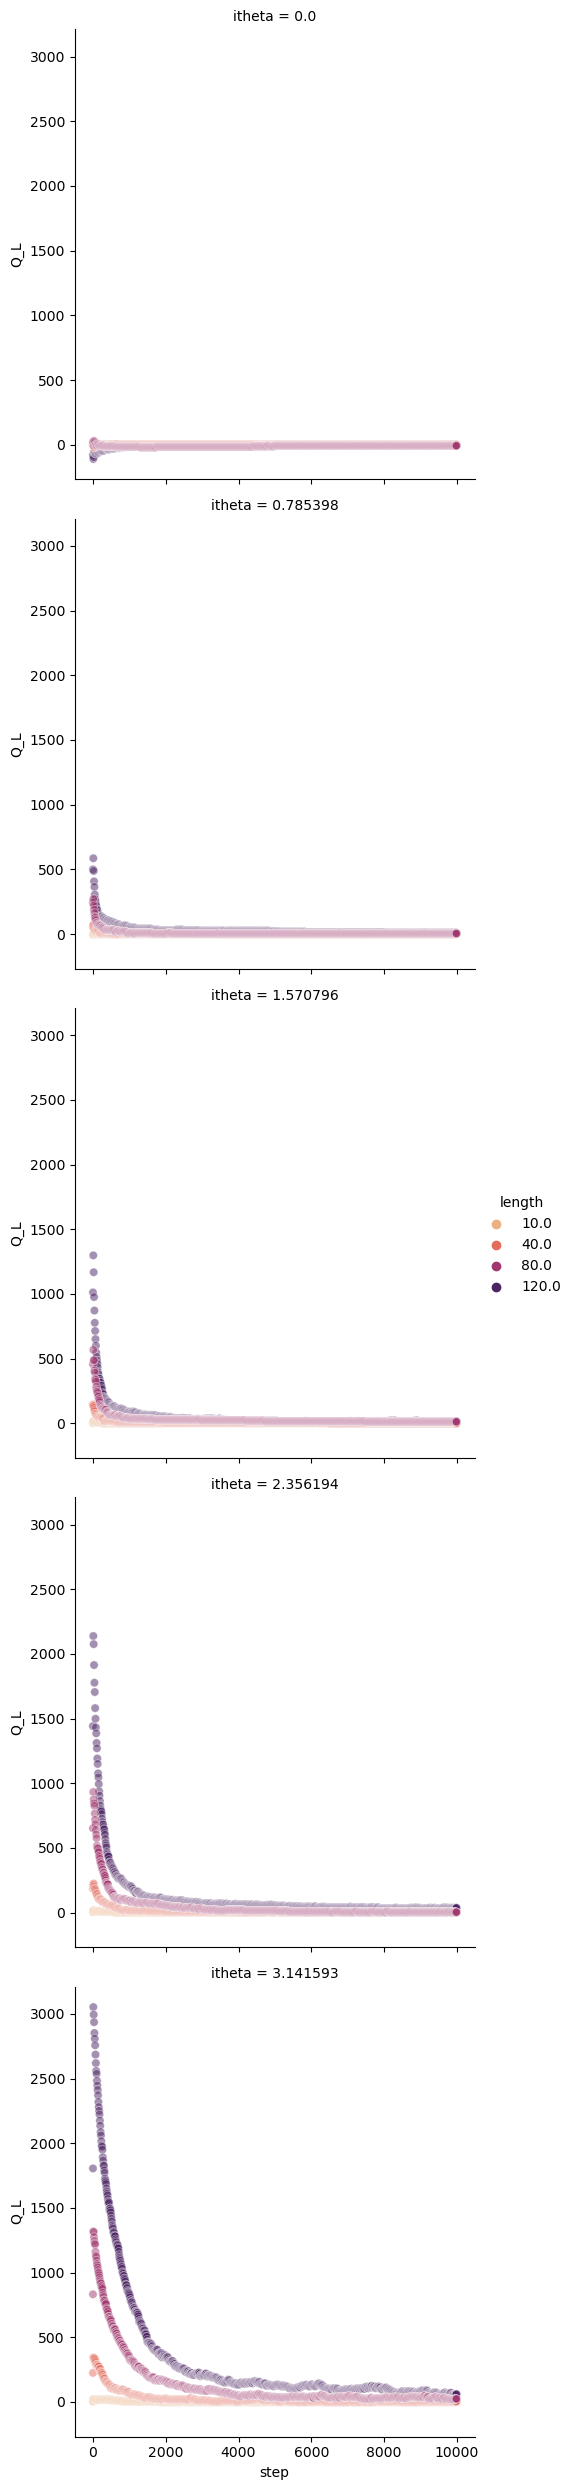

In [8]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",row = "itheta",
            alpha = 0.5,palette = "flare" )
plt.show()

In [16]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
freq = 10
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm, "freq": freq}

In [17]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

freq 10
nMC 10000
ntherm 0
itheta 1.570796
beta 1.6
length 10


In [18]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.898917,-156.799433,-158.211449,6.210427,3.009414,1.373289,0.440000,0.0,...,4,36,36,58,2.833211,0.243378,1.981237,-0.342914,0.350371,-0.030097
1,10,100.0,16.386205,-368.944817,-394.684207,13.770257,3.009414,1.373289,0.225455,0.0,...,4,36,36,58,4.218802,0.362402,1.981237,-0.342914,0.235298,-0.020212
2,20,100.0,15.794927,-399.443347,-424.253960,11.520467,3.009414,1.373289,0.172857,0.0,...,4,36,36,58,3.858808,0.331478,1.981237,-0.342914,0.257249,-0.022098
3,30,100.0,13.718759,-398.298540,-419.847915,10.854147,3.009414,1.373289,0.157419,0.0,...,4,36,36,58,3.745553,0.321749,1.981237,-0.342914,0.265028,-0.022766
4,40,100.0,9.978407,-422.607798,-438.281842,2.138161,3.009414,1.373289,0.145366,0.0,...,4,36,36,58,1.662411,0.142804,1.981237,-0.342914,0.597130,-0.051294


In [19]:
decorr = analyzer.ta(run["Q_L"])

In [20]:
run = analyzer.autocorrelation(run)

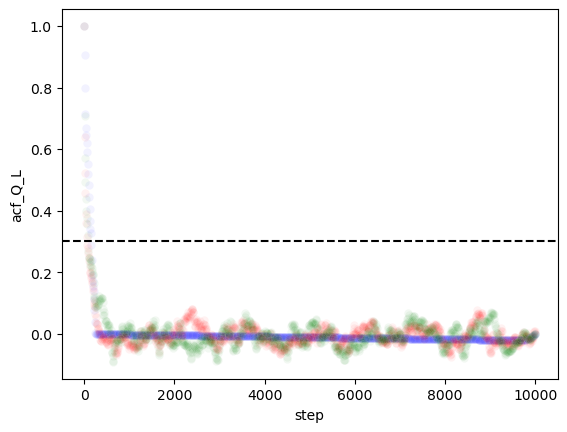

In [21]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

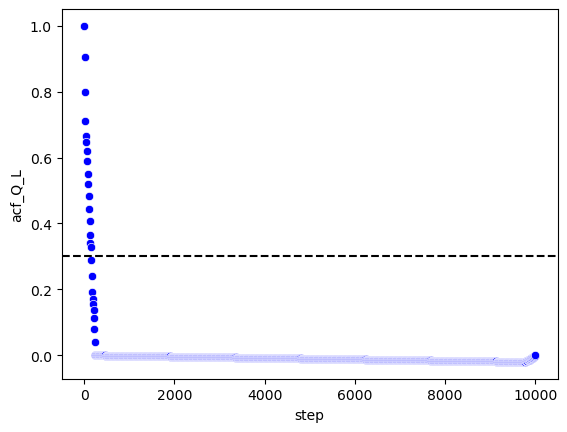

In [22]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

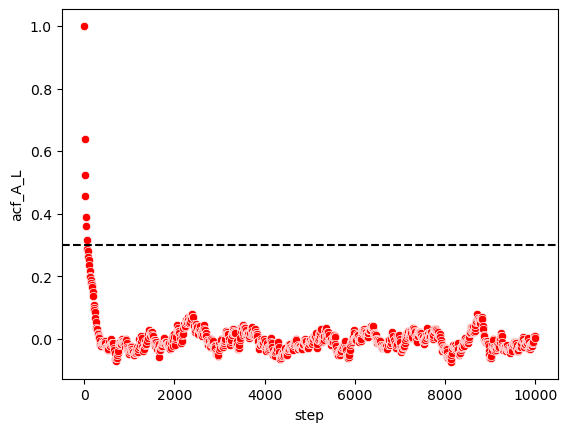

In [23]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

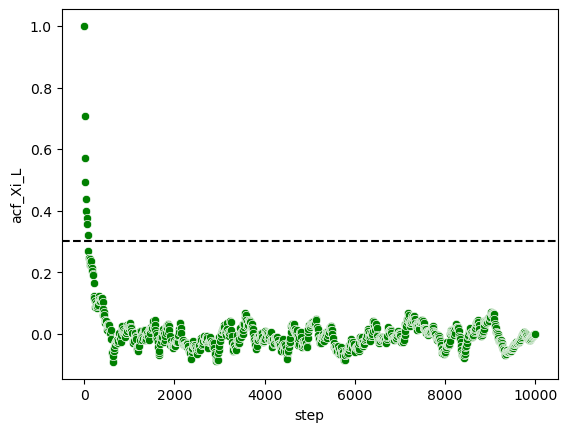

In [24]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [25]:
df_ta = analyzer.do_stats(therm = 0.0, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [26]:
df_ta.head()

ta
  observable      
0 Q_L          1.0
  A_L         35.0
  S_L         35.0
  Xi_L        44.0
1 Q_L          1.0

In [27]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
           palette = analyzer.palette)
plt.show()

ValueError: Could not interpret value `itheta` for parameter `x`

In [ ]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
           palette = analyzer.palette)
plt.show()

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [32]:
df_dt = analyzer.get_data()

In [33]:
df_dt = df_dt.dropna(subset = ['dt'])

In [34]:
df_dt.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480000,5.0,...,1,35,35,44,0.036694,0.890296,2.710455,0.223807,0.046216,-1.121317
1,10,100.0,-3.099152,-397.549965,-397.549965,3.169001,6.964259,3.693286,0.238182,56.0,...,1,35,35,44,1.745104,-0.071926,2.710455,0.223807,0.572060,0.023578
2,20,100.0,-4.000000,-442.745734,-442.745734,-2.883489,6.964259,3.693286,0.179524,106.0,...,1,35,35,44,0.068609,1.664636,2.710455,0.223807,0.024718,-0.599713
3,30,100.0,0.125517,-465.454254,-465.454254,-6.878379,6.964259,3.693286,0.161613,157.0,...,1,35,35,44,0.105966,2.571007,2.710455,0.223807,0.016004,-0.388293
4,40,100.0,0.717142,-471.968907,-471.968907,-9.850147,6.964259,3.693286,0.145610,160.0,...,1,35,35,44,0.126808,3.076675,2.710455,0.223807,0.013373,-0.324475


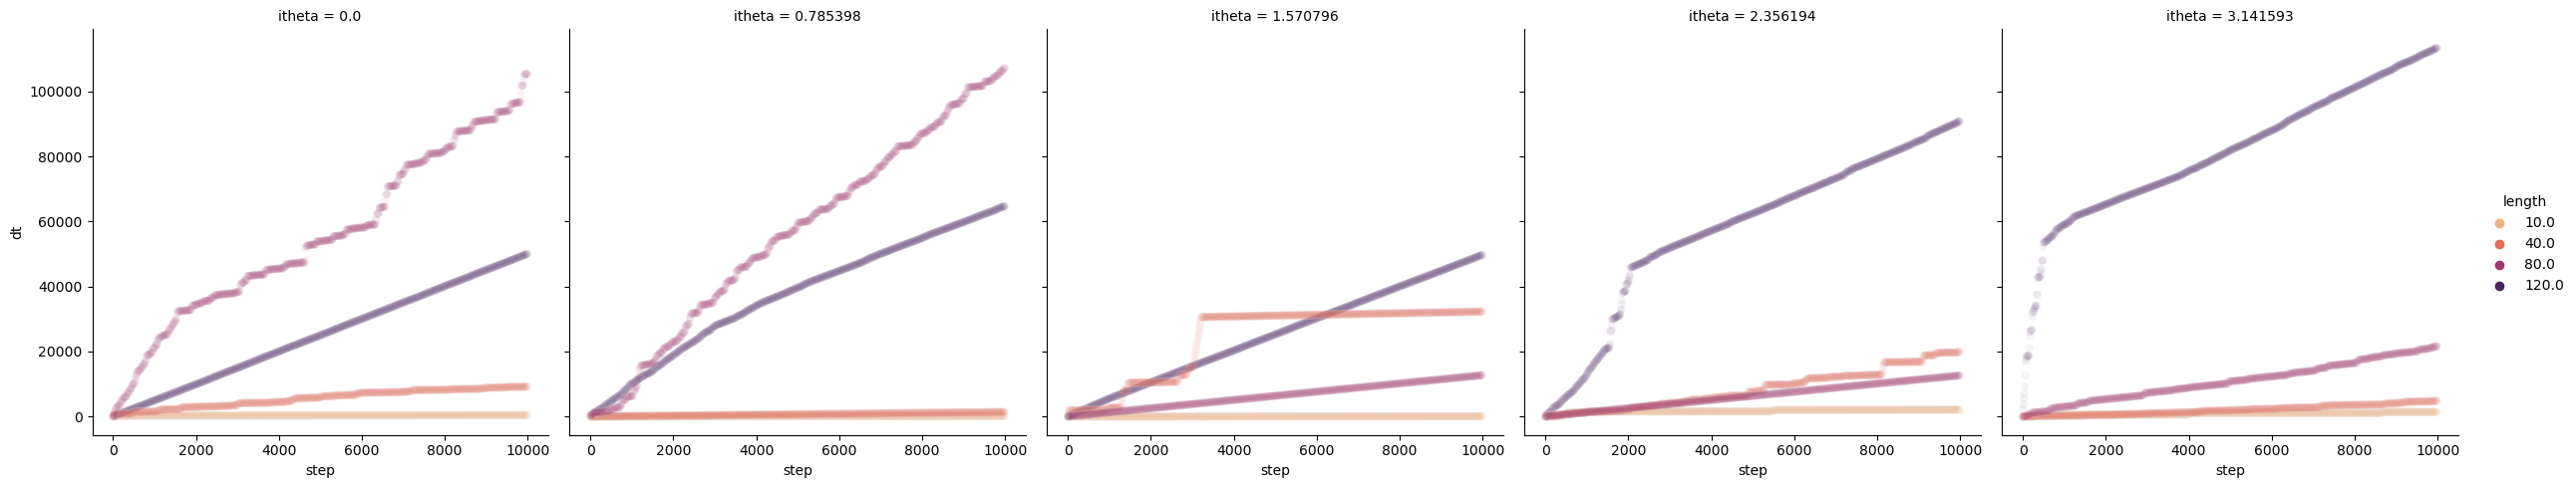

In [35]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [38]:
df_time = analyzer.do_stats()

In [40]:
df_time.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,10.0,0.000000,1.6,10000.0,0.0,10.0,100.0,-0.012143,-534.377580,-534.377580,...,0.014493,1.355778,0.263218,0.0,0.0,0.044918,0.047585,428.0,7.133333,0.118889
1,10.0,0.785398,1.6,10000.0,0.0,10.0,100.0,0.002561,-534.680977,-534.682989,...,0.013948,1.407782,0.417830,0.0,0.0,0.035568,0.069812,129.0,2.150000,0.035833
2,10.0,1.570796,1.6,10000.0,0.0,10.0,100.0,0.183030,-533.955175,-534.242678,...,0.013465,1.591994,0.372619,0.0,0.0,0.073288,0.039934,69.0,1.150000,0.019167
3,10.0,2.356194,1.6,10000.0,0.0,10.0,100.0,0.523574,-532.394234,-533.627877,...,0.013720,1.504475,0.458918,0.0,0.0,0.038980,0.046378,2090.0,34.833333,0.580556
4,10.0,3.141593,1.6,10000.0,0.0,10.0,100.0,1.624498,-526.171985,-531.275495,...,0.013104,2.490597,0.975107,0.0,0.0,0.092189,0.043959,1399.0,23.316667,0.388611


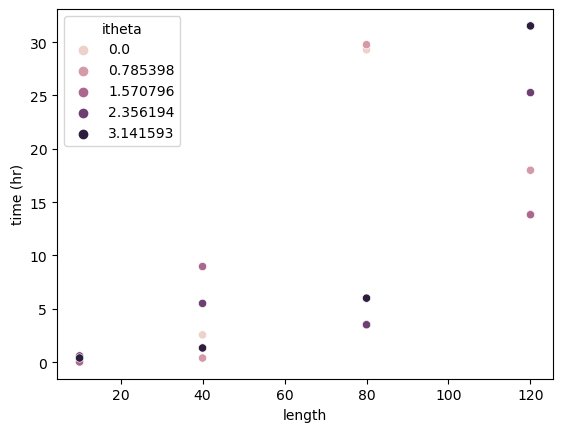

In [41]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)", hue = "itheta")
#plt.yscale('log')
plt.show()